In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Lorenz attractor


$$\begin{alignedat}{0}
    \frac{dx}{dt} = \sigma (y - x)\\
    \\
    \frac{dy}{dt} = x (\rho - z) - y\\
    \\
    \frac{dz}{dt} = x y - \beta z
\end{alignedat}$$

Text(0.5, 0, 'Z Axis')

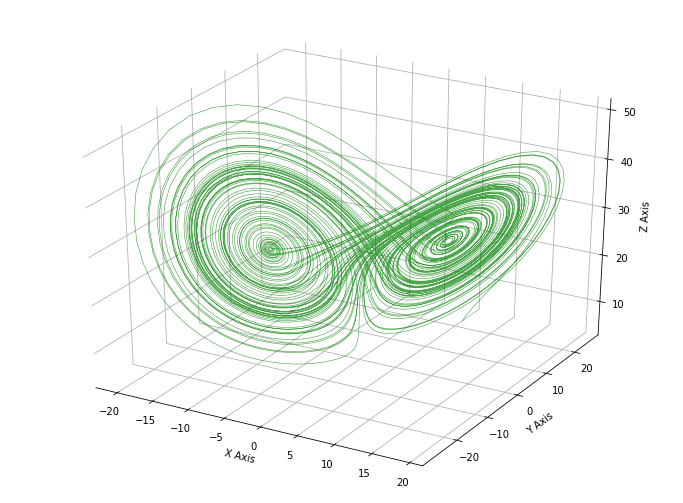

In [59]:
sigma = 10
rho = 28
beta = 8/3

h = 0.01
t = 10000

x = np.empty(t+1)
y = np.empty(t+1)
z = np.empty(t+1)

x[0]=10
y[0]=10
z[0]=10

for i in range(t):        
    x[i+1] = x[i] + h*(sigma*(y[i] - x[i]))
    y[i+1] = y[i] + h*(x[i]*(rho - z[i]) - y[i])
    z[i+1] = z[i] + h*(x[i]*y[i] - beta*z[i])


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
# ax.view_init(30,90)

Text(0.5, 1.0, 'y-z phase plane')

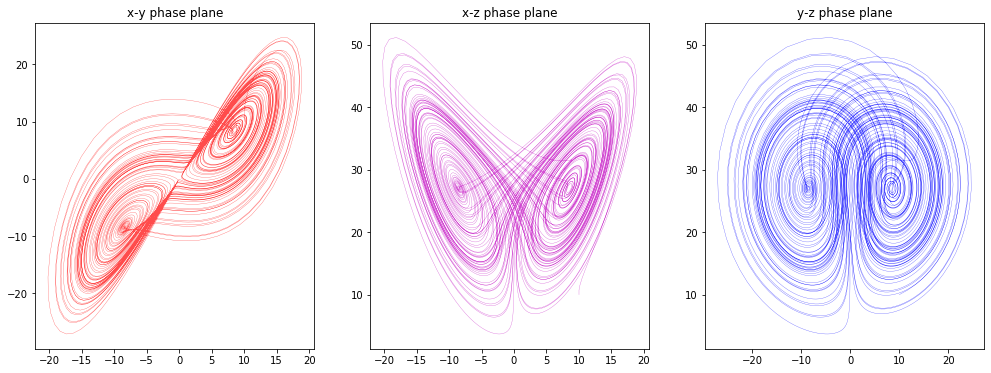

In [3]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

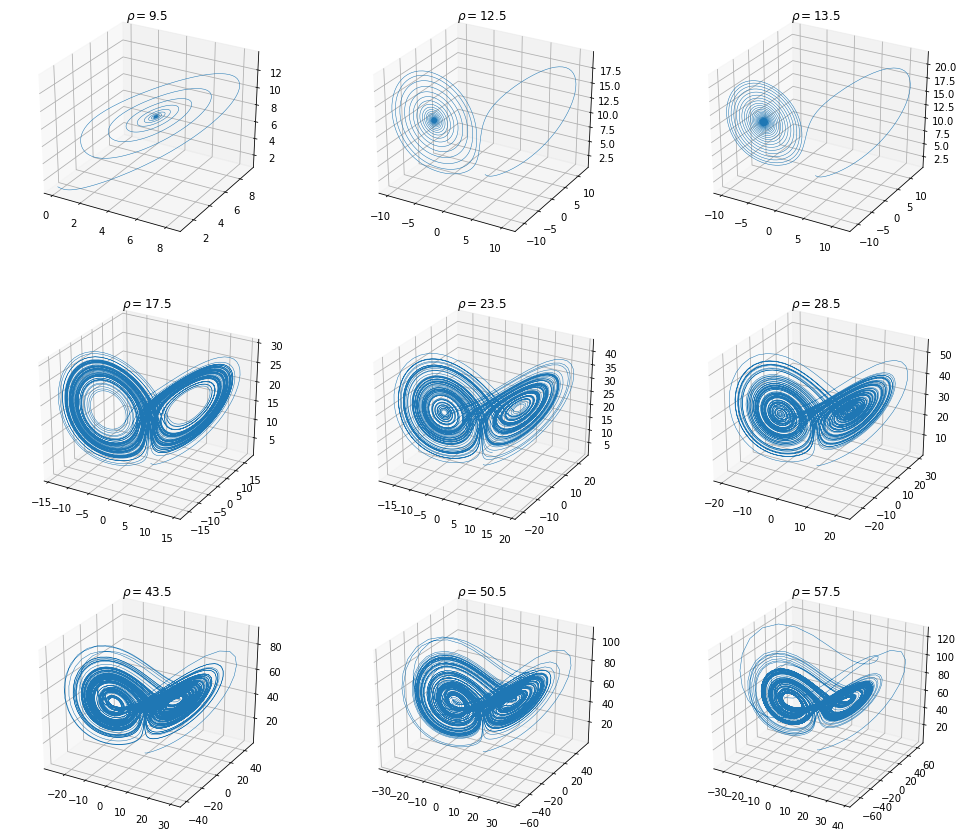

In [35]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

sigma = 10
rhos = [9, 12, 13, 17, 23, 28, 43, 50, 57]
beta = 8/3

dt = 0.01
num_steps = 10000

fig = plt.figure(figsize=(17, 15))

for irho, rho in enumerate(rhos):
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    
    
    xs[0] = 0
    ys[0] = 1
    zs[0] = 1.05
    
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=10, r=rho, b=2.667)
        xs[i+1] = xs[i] + (x_dot * dt)
        ys[i+1] = ys[i] + (y_dot * dt)
        zs[i+1] = zs[i] + (z_dot * dt)


    ax=fig.add_subplot(f'33{irho+1}',projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_title(r"$\rho={}$".format(rho))

# Duffing equation

$$y'' + \delta y' + \alpha y + \beta y^3 = \gamma \cos (\omega t)$$
--------------------
$$\begin{alignedat}{0}
   u'=v\\
   \\
   v'=\gamma \cos (\omega t)-\delta v - \alpha u - \beta u^3
\end{alignedat}$$

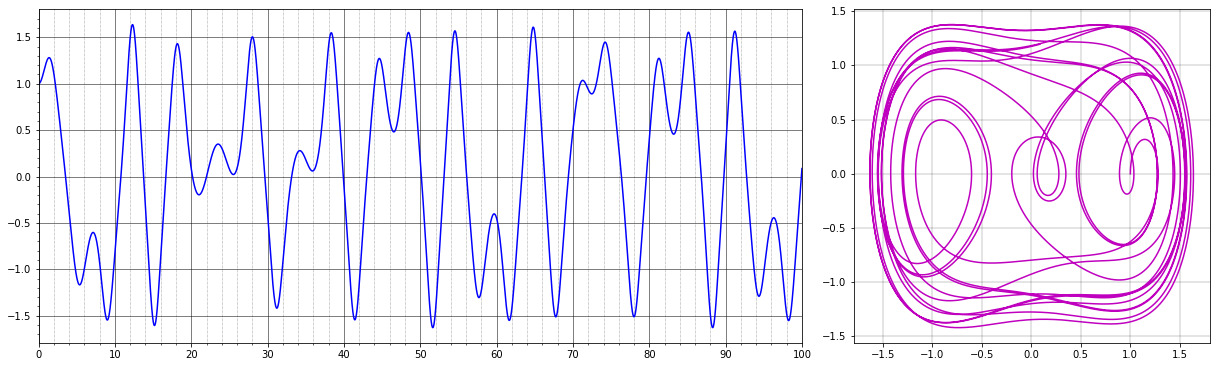

In [61]:
alpha=-1
beta=1
delta=0.3
omega=1.2
gamma=0.7

h=0.01
t = np.arange(0, 100, h)

u = np.zeros(len(t))
v = np.zeros(len(t))

u[0]=1
v[0]=0

for i in range(1,len(t)):        
    u[i] = u[i-1] + h*(v[i-1])
    v[i] = v[i-1] + h*(gamma*np.cos(omega*t[i]) - delta*v[i-1] - alpha*u[i-1] - beta*u[i-1]**3)


fig = plt.figure(figsize=(17, 15))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=2)
ax1.plot(t, u, color='blue')

ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth=0.5, color='black', zorder=0)
ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7, axis='x', zorder=0)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.set_xlim(xmin=0,xmax=100)

ax2 = plt.subplot2grid((3,3), (0,2))
ax2.plot(u, v, color='m')
ax2.grid(which='major', linestyle='-', linewidth=0.3, alpha=0.7, color='black')

fig.tight_layout()

# WINDMI chaotic attractor


$$\begin{alignedat}{0}
    \frac{dx}{dt} = y\\
    \\
    \frac{dy}{dt} = z\\
    \\
    \frac{dz}{dt} = -az-y+b-e^x
\end{alignedat}$$

Text(0.5, 0, 'Z Axis')

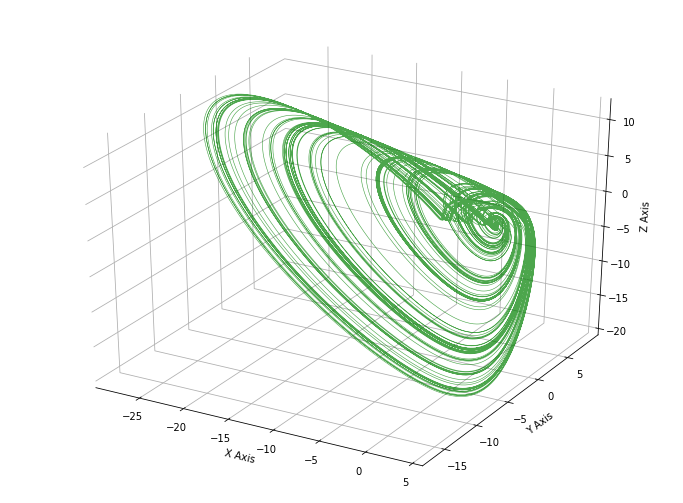

In [65]:
a = 0.7
b = 2.5

h = 0.01
t = 100000

x = np.empty(t+1)
y = np.empty(t+1)
z = np.empty(t+1)

x[0]=1.4
y[0]=0.8
z[0]=2.5

for i in range(t):        
    x[i+1] = x[i] + h*(y[i])
    y[i+1] = y[i] + h*(z[i])
    z[i+1] = z[i] + h*(-a*z[i]-y[i]+b-np.exp(x[i]))


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

Text(0.5, 1.0, 'y-z phase plane')

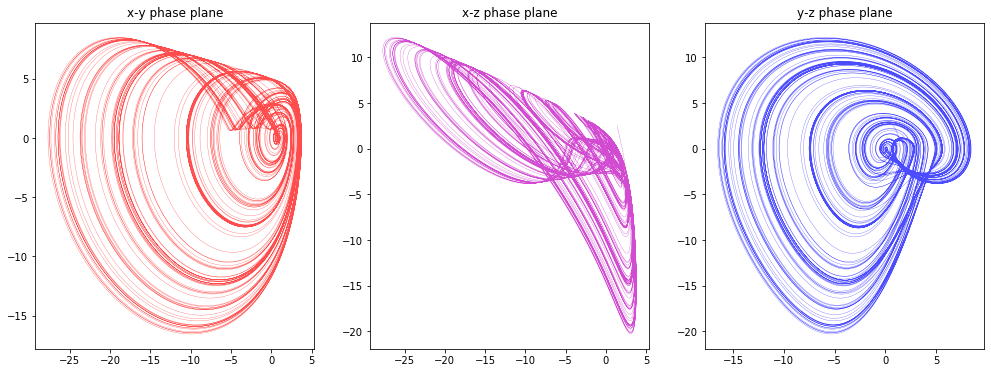

In [66]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

$$\frac{d^4x}{dt^4}=a\frac{d^3x}{dt^3}+bx\frac{dx}{dt}+x\frac{d^3x}{dt^3}+c\left (x^2+x\frac{d^2x}{dt^2}+1 \right )$$
--------------------
$$\begin{alignedat}{0}
    \frac{dx}{dt} = y\\
    \\
    \frac{dy}{dt} = z\\
    \\
    \frac{dz}{dt} = w\\
    \\
    \frac{dw}{dt} = aw+bxy+xw+c(x^2+xz+1)
\end{alignedat}$$

Text(0.5, 0, 'Z Axis')

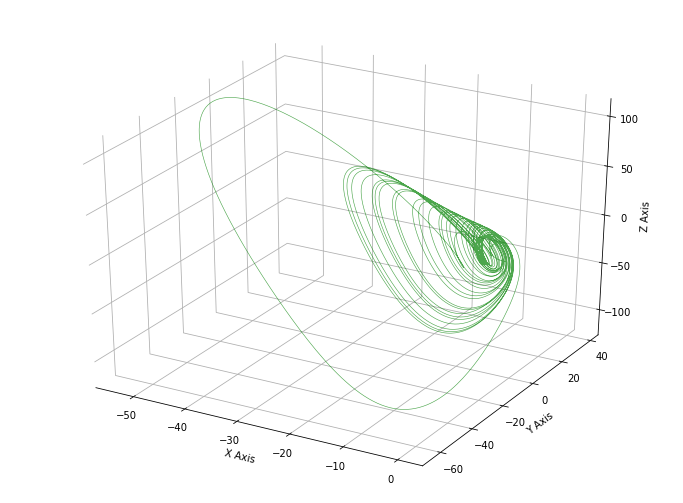

In [88]:
a = 2.2
b = 5
c = 2

h = 0.01
t = 10000

x = np.empty(t+1)
y = np.empty(t+1)
z = np.empty(t+1)
w = np.empty(t+1)

x[0]=0
y[0]=-5
z[0]=0
w[0]=0

for i in range(t):        
    x[i+1] = x[i] + h*(y[i])
    y[i+1] = y[i] + h*(z[i])
    z[i+1] = z[i] + h*(w[i])
    w[i+1] = w[i] + h*(a*w[i] + b*x[i]*y[i] + x[i]*w[i] + c*(x[i]**2 + x[i]*z[i] + 1))


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

$$\begin{alignedat}{0}
    \frac{dx}{dt} = y\\
    \\
    \frac{dy}{dt} = z\\
    \\
    \frac{dz}{dt} = w\\
    \\
    \frac{dw}{dt} = -cx-by-e^z-aw
\end{alignedat}$$

Text(0.5, 0, 'Z Axis')

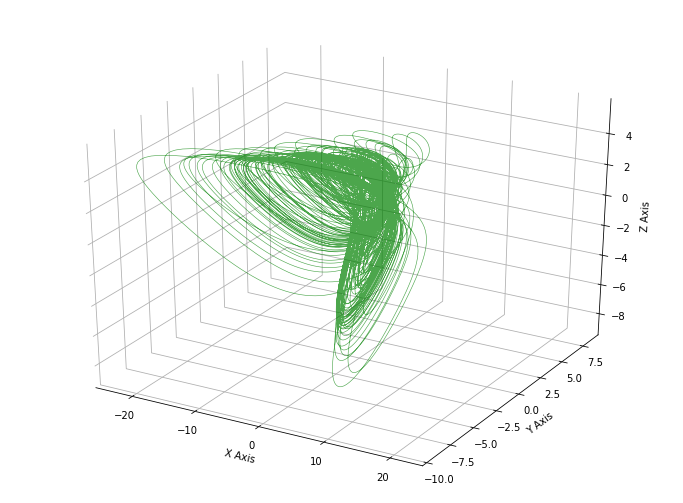

In [115]:
a = 1
b = 3
c = 1

h = 0.01
t = 50000

x = np.empty(t+1)
y = np.empty(t+1)
z = np.empty(t+1)
w = np.empty(t+1)

x[0]=0
y[0]=-0.5
z[0]=0.1
w[0]=1

for i in range(t):        
    x[i+1] = x[i] + h*(y[i])
    y[i+1] = y[i] + h*(z[i])
    z[i+1] = z[i] + h*(w[i])
    w[i+1] = w[i] + h*(-c*x[i] - b*y[i] - np.exp(z[i]) - a*w[i])


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(w, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")